In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('퓨처스/intergrated.csv')

In [3]:
# df = df.astype({'application_id': 'object',
#                 'bank_id':'object',
#                'product_id':'object',
#                'is_applied':'object',
#                'weekday':'object',
#                'user_id':'object',
#                'gender':'object',
#                'personal_rehabilitation_yn':'object',
#                'personal_rehabilitation_complete_yn':'object',
#                })

In [3]:
df=df.select_dtypes(include = ["number"])

In [4]:
train=df[~(df['is_applied'].isnull())]

In [5]:
train=train.drop(['Unnamed: 0'],axis=1)

In [6]:
train.isnull().sum()

application_id                               0
bank_id                                      0
product_id                                   0
loan_limit                                5738
loan_rate                                 5738
is_applied                                   0
application_n                                0
weekday                                      0
user_id                                    113
gender                                   91739
credit_score                           1243925
yearly_income                              113
company_enter_month                     303681
desired_amount                             113
personal_rehabilitation_yn             5873342
personal_rehabilitation_complete_yn    9232345
existing_loan_cnt                      2143924
existing_loan_amt                      3044253
age                                      91739
SignUp                                  394464
OpenApp                                 394464
Login        

In [7]:
train=train[~(train['user_id'].isnull())]
train=train[~(train['age'].isnull())]

In [8]:
train=train.fillna(0)

In [9]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

model.fit(train.drop('is_applied',axis=1))

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
train['cluster'] = model.fit_predict(train)

In [10]:
train['cluster'].value_counts()

0    10169917
1        8468
Name: cluster, dtype: int64

In [11]:
train['is_applied'].value_counts()

0.0    9622673
1.0     555712
Name: is_applied, dtype: int64

In [12]:
train.head()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,application_n,weekday,user_id,gender,...,Login,ViewLoanApplyIntro,StartLoanApply,CompleteIDCertification,EndLoanApply,UseLoanManage,UsePrepayCalc,UseDSRCalc,GetCreditInfo,cluster
13301,2157865,54,235,20000000.0,16.5,1.0,1,0,346970.0,1.0,...,5.0,5.0,4.0,5.0,13.0,5.0,0.0,0.0,6.0,0
13302,576643,54,235,11000000.0,16.5,0.0,2,0,545882.0,1.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0
13303,576643,11,118,3000000.0,20.0,0.0,2,0,545882.0,1.0,...,19.0,14.0,19.0,12.0,21.0,0.0,0.0,0.0,0.0,0
13304,2136706,42,216,10000000.0,13.5,0.0,40,0,558819.0,1.0,...,34.0,7.0,32.0,3.0,29.0,15.0,0.0,0.0,18.0,0
13305,2136706,25,169,22000000.0,15.9,0.0,40,0,558819.0,1.0,...,34.0,7.0,32.0,3.0,29.0,15.0,0.0,0.0,18.0,0


(array([[9.6226730e+06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 5.5571200e+05],
        [1.0169917e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 8.4680000e+03]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

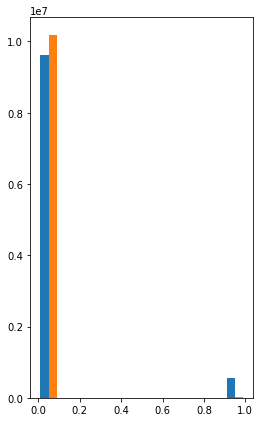

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (4, 7))
plt.hist([train['is_applied'],train['cluster']],label=['is_apllied','cluster'])